In [23]:
import pandas as pd
import plotly.express as px

pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
         r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"]

# Faccio un dizionario per mappare i file agli anni
year_mapping = { r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx": 2019, 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx": 2020, 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx": 2021,
         r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx":2022, 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx": 2023}
# Questa parte di codice crea 5 figure che rappresentano il riquadro di correlazione fra le statistiche per annata

correlations = []
years = []


colonne_da_eliminare = ['Player','Squad','Nation','Pos','short Cmp%','medium Cmp%','long Cmp%', 'AerTot']

for file in files:
    
    data_frame = pd.read_excel(file)
    # Uso .drop per rimuovere dal data frame quelle statistiche che non voglio usare in questa analisi
    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()  # Calcolo la matrice di correlazione

    year = year_mapping[file]  # Ottengo l'anno dal file usando il mapping
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")
    # Ottengo in output il grafico di correlazione

    fig.show()

# Inserisco questa riga di codice in modo da poter visualizzare le colonne usate per l'analisi
print(f'Le colonne usate per questa analisi sono {list(data_frame.columns)}')

Le colonne usate per questa analisi sono ['Age', 'Tkl', 'TklW', 'Blocks', 'Sh', 'Pass', 'Err', 'MP', 'Gls', 'Ast', 'CrdY', 'CrdR', 'KP', 'Fls', 'Crs', 'OG', 'AerWon', 'AerLost', 'CrdY + CrdR']


L'età, come si può ben notare dai grafici, risulta poco correlata con ogni statistica. Ciò evidenzia come nel ruolo del difensore non sia un fattore completamente dipendete al rendimento.


In [18]:
# Creo una funzione che mi permette di scoprire quali sono le statistiche meglio e peggio correlate con una desiderata

def best_worst(stat):
 for file in files:
    year = year_mapping[file]
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()

    if stat in corr_matrix.columns:
        # Ordina le correlazioni con la statistica scelta
        sorted_corr = corr_matrix[stat].sort_values(ascending=False)

        # Trova le 5 migliori e peggiori correlazioni (cambiare i range per saperne di più o di meno)
        best_corr = sorted_corr[1:6]  # Parto da 1 per evitare la correlazione della statistica con se stessa
        worst_corr = sorted_corr[-5:]

        print(f"Anno {year}: Le 5 statistiche meglio correlate con {stat} sono:\n{best_corr}")
        print(f"Anno {year}: Le 5 statistiche peggio correlate con {stat} sono:\n{worst_corr}")
    else:
        print(f"La statistica {stat} non è presente nel dataset. Controlla l'input")

# Creo una funzione che restituisce l'elenco degli indci di correlazione di una statistica con le altre anno per anno

def correlazioni_annuali(stat):
    for file in files:
        year = year_mapping[file]
        data_frame = pd.read_excel(file) 

        data_frame.drop(columns=colonne_da_eliminare, inplace=True)

        corr_matrix = data_frame.corr()

        if stat in corr_matrix.columns:
            sorted_corr = corr_matrix[stat].sort_values(ascending=False)

            print(f"Anno {year}: Le correlazioni per {stat} sono:\n{sorted_corr}\n")
        else:
            print(f"La statistica {stat} non è presente nel dataset dell'anno {year}.")
        
# Creo una seconda funzione che mi dice l'indice di correlazione di due statistiche specifiche
# ed il cambiamento di questo nel corso delle stagioni

def correlazione(stat1,stat2):
 correlations = []

 for file in files:
    
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True)

    corr_matrix = data_frame.corr()

    year = year_mapping[file]

    # Verifica se entrambe le statistiche esistono nella matrice di correlazione
    if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
        correlation_value = corr_matrix.loc[stat1, stat2]
        correlations.append((year, correlation_value))
        #print(f"Anno {year}: Correlazione tra {stat1} e {stat2} = {correlation_value}")
    else:
        correlations.append((year, None))

# Creazione del DataFrame per il grafico
 if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
    correlation_df = pd.DataFrame(correlations, columns=['Anno', 'Correlazione'])
    
    # Crea il grafico dell'andamento della correlazione nel tempo
    fig = px.line(correlation_df, x='Anno', y='Correlazione', title=f"Correlazione tra {stat1} e {stat2}", markers=True)
    fig.update_xaxes(dtick=1)
    fig.update_yaxes(range = [-1,1], dtick = 0.10)
    fig.show()
 else:
    print("Nessun grafico disponibile: non sono state calcolate correlazioni valide. Controlla l'input")

In [20]:


 stat = 'Tkl'
best_worst(stat)

stat1 = 'Tkl'
stat2 = 'Fls'
correlazione(stat1, stat2)

stat1 = 'Tkl'
stat2 = 'Blocks'
correlazione(stat1, stat2)

stat1 = 'Tkl'
stat2 = 'CrdY + CrdR'
correlazione(stat1, stat2)

Anno 2019: Le 5 statistiche meglio correlate con Tkl sono:
TklW      0.975840
MP        0.841936
Pass      0.835199
Fls       0.827828
Blocks    0.801314
Name: Tkl, dtype: float64
Anno 2019: Le 5 statistiche peggio correlate con Tkl sono:
Crs     0.337695
Ast     0.335082
OG      0.266144
Age     0.206110
CrdR    0.202948
Name: Tkl, dtype: float64
Anno 2020: Le 5 statistiche meglio correlate con Tkl sono:
TklW      0.976159
MP        0.837114
Fls       0.818008
Blocks    0.809983
Pass      0.794690
Name: Tkl, dtype: float64
Anno 2020: Le 5 statistiche peggio correlate con Tkl sono:
Ast     0.466595
Err     0.424412
CrdR    0.205207
OG      0.151535
Age     0.109009
Name: Tkl, dtype: float64
Anno 2021: Le 5 statistiche meglio correlate con Tkl sono:
TklW      0.980722
Pass      0.833451
MP        0.823131
Blocks    0.816972
Fls       0.789293
Name: Tkl, dtype: float64
Anno 2021: Le 5 statistiche peggio correlate con Tkl sono:
Crs     0.367059
Err     0.358312
CrdR    0.221926
Age     0.

In [21]:
stat = 'Pass'
best_worst(stat)

stat1 = 'Pass'
stat2 = 'Blocks'
correlazione(stat1, stat2)

stat2 = 'TklW'
correlazione(stat1, stat2)

stat2 = 'KP'
correlazione(stat1, stat2)


Anno 2019: Le 5 statistiche meglio correlate con Pass sono:
Tkl       0.835199
TklW      0.821938
Blocks    0.789600
MP        0.782419
Fls       0.722216
Name: Pass, dtype: float64
Anno 2019: Le 5 statistiche peggio correlate con Pass sono:
Sh      0.410886
Err     0.316641
OG      0.210362
Age     0.168207
CrdR    0.116621
Name: Pass, dtype: float64
Anno 2020: Le 5 statistiche meglio correlate con Pass sono:
Blocks    0.828954
MP        0.800429
Tkl       0.794690
TklW      0.782972
Fls       0.697086
Name: Pass, dtype: float64
Anno 2020: Le 5 statistiche peggio correlate con Pass sono:
Sh      0.386597
Err     0.338271
OG      0.197600
CrdR    0.158225
Age     0.067233
Name: Pass, dtype: float64
Anno 2021: Le 5 statistiche meglio correlate con Pass sono:
Tkl       0.833451
TklW      0.816290
Blocks    0.799867
MP        0.783409
Fls       0.709042
Name: Pass, dtype: float64
Anno 2021: Le 5 statistiche peggio correlate con Pass sono:
Sh      0.338289
Err     0.284801
CrdR    0.148214

In [15]:
stat = 'KP'
best_worst(stat)

stat1 = 'KP'
stat2 = 'Ast'
correlazione(stat1, stat2)

Anno 2019: Le 5 statistiche meglio correlate con KP sono:
Crs     0.883874
Ast     0.769624
Pass    0.622081
MP      0.608585
TklW    0.501534
Name: KP, dtype: float64
Anno 2019: Le 5 statistiche peggio correlate con KP sono:
AerWon    0.142899
OG        0.048190
Sh        0.032269
Err       0.029787
CrdR     -0.073918
Name: KP, dtype: float64
Anno 2020: Le 5 statistiche meglio correlate con KP sono:
Ast     0.791353
MP      0.630890
Pass    0.615743
Tkl     0.536114
Gls     0.528981
Name: KP, dtype: float64
Anno 2020: Le 5 statistiche peggio correlate con KP sono:
AerWon    0.174026
OG        0.108260
CrdR      0.080138
Sh        0.056713
Age      -0.001202
Name: KP, dtype: float64
Anno 2021: Le 5 statistiche meglio correlate con KP sono:
Crs     0.909883
Ast     0.745563
Pass    0.583040
MP      0.568285
Gls     0.558363
Name: KP, dtype: float64
Anno 2021: Le 5 statistiche peggio correlate con KP sono:
CrdR      0.135475
Age       0.123570
AerWon    0.069549
OG        0.001108
Sh    

Correlazione tra Pass e KP per l'anno 2019: 0.622081198363798
Correlazione tra Pass e KP per l'anno 2020: 0.6157430175231996
Correlazione tra Pass e KP per l'anno 2021: 0.5830397048190965
Correlazione tra Pass e KP per l'anno 2022: 0.5791765701976532
Correlazione tra Pass e KP per l'anno 2023: 0.5459051523327018
Correlazione tra Pass e Err per l'anno 2019: 0.31664065067574915
Correlazione tra Pass e Err per l'anno 2020: 0.33827087303198167
Correlazione tra Pass e Err per l'anno 2021: 0.2848007856846977
Correlazione tra Pass e Err per l'anno 2022: 0.16583554679291213
Correlazione tra Pass e Err per l'anno 2023: 0.1769743428618459
Correlazione tra Pass e Ast per l'anno 2019: 0.4843261738168098
Correlazione tra Pass e Ast per l'anno 2020: 0.554091489051135
Correlazione tra Pass e Ast per l'anno 2021: 0.5424446853145981
Correlazione tra Pass e Ast per l'anno 2022: 0.48035860264494107
Correlazione tra Pass e Ast per l'anno 2023: 0.4616735368475237


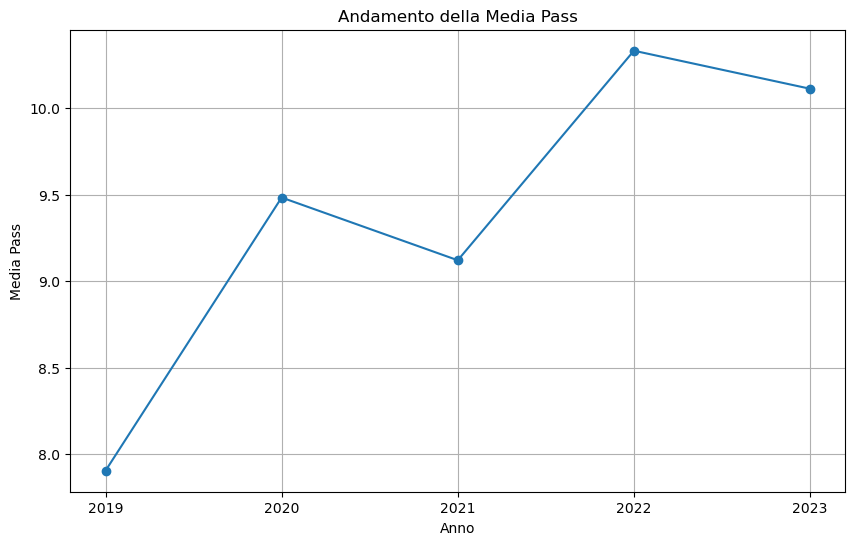

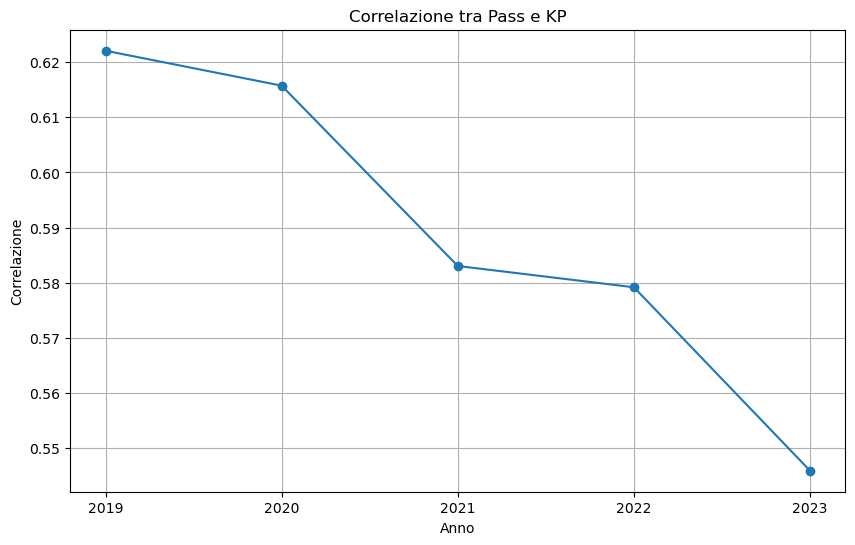

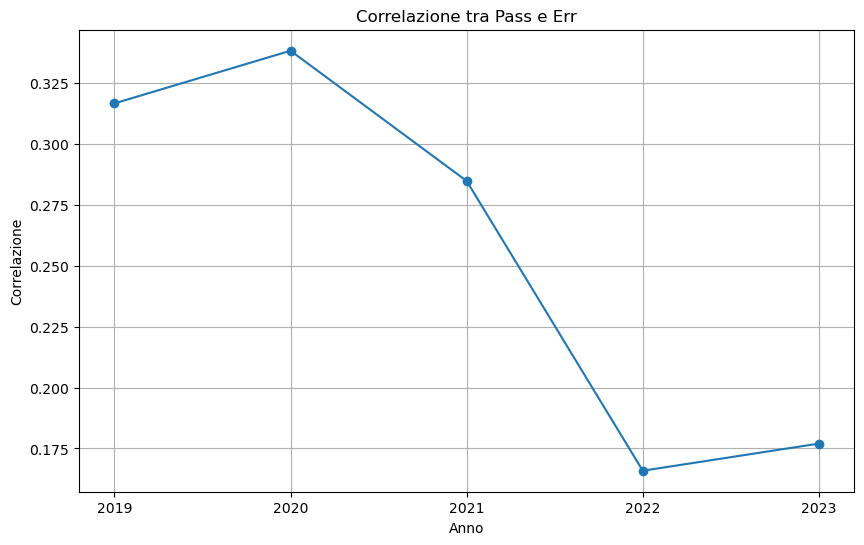

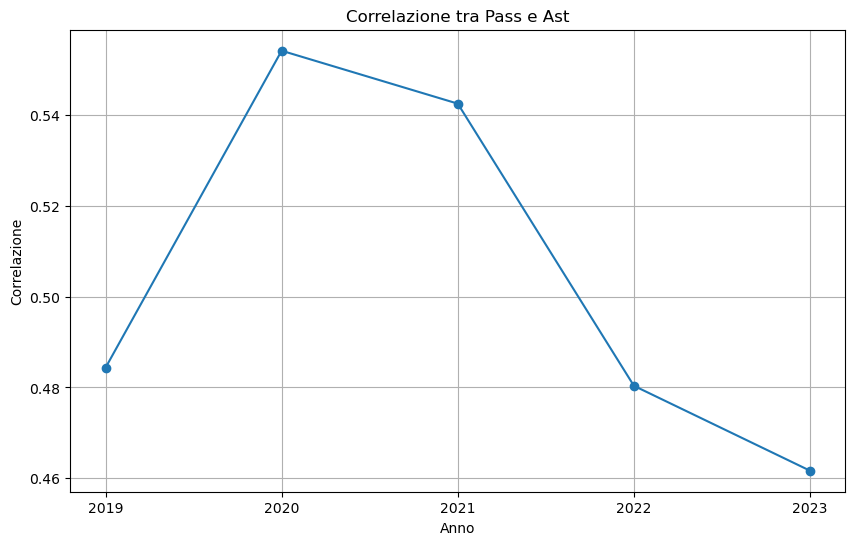

In [66]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Imposta le opzioni di visualizzazione
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [
    r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"
]

# Mappatura degli anni
year_mapping = {
    'difensori_2023.xlsx': 2023,
    'difensori_2022.xlsx': 2022,
    'difensori_2021.xlsx': 2021,
    'difensori_2020.xlsx': 2020,
    'difensori 2019.xlsx': 2019
}

# Colonne da eliminare
colonne_da_eliminare = ['Player', 'Squad', 'Nation', 'Pos', 'short Cmp%', 'medium Cmp%', 'long Cmp%', 'CrdY + CrdR', 'AerTot']

def best_worst(stat):
    results = []
    for file in files:
        file_name = os.path.basename(file)
        year = year_mapping[file_name]
        data_frame = pd.read_excel(file)
        data_frame.drop(columns=colonne_da_eliminare, inplace=True)
        
        # Calcola la media della statistica per l'anno corrente
        mean_stat = data_frame[stat].mean()
        results.append((year, mean_stat))
    
    return results

def correlazione(stat1, stat2):
    results = []
    for file in files:
        file_name = os.path.basename(file)  # Estrai solo il nome del file
        year = year_mapping[file_name]  # Usa il nome del file per ottenere l'anno
        data_frame = pd.read_excel(file)
        data_frame.drop(columns=colonne_da_eliminare, inplace=True)
        
        # Calcola la matrice di correlazione
        corr_matrix = data_frame.corr()
        
        # Verifica se entrambe le statistiche esistono nella matrice di correlazione
        if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
            correlation_value = corr_matrix.loc[stat1, stat2]
            results.append((year, correlation_value))
            print(f'Correlazione tra {stat1} e {stat2} per l\'anno {year}: {correlation_value}')
        else:
            print(f'Una delle statistiche {stat1} o {stat2} non esiste nel file {file_name}.')
    
    return results

def plot_single_trend(years, values, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(years, values, marker='o')
    plt.xlabel('Anno')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.xticks(years)  # Mostra gli anni sull'asse x
    plt.show()

# Nuovo esempio di utilizzo
stat = 'Pass'
best_worst_results_pass = best_worst(stat)

stat1 = 'Pass'
stat2 = 'KP'
correlazione_results_pass_kp = correlazione(stat1, stat2)

stat2 = 'Err'
correlazione_results_pass_err = correlazione(stat1, stat2)

stat2 = 'Ast'
correlazione_results_pass_ast = correlazione(stat1, stat2)

# Chiamata alla funzione per creare i grafici separati per le nuove statistiche
years_pass = [result[0] for result in best_worst_results_pass]
best_worst_values_pass = [result[1] for result in best_worst_results_pass]
plot_single_trend(years_pass, best_worst_values_pass, f'Andamento della Media {stat}', f'Media {stat}')

correlation_years_pass_kp = [result[0] for result in correlazione_results_pass_kp]
correlation_values_pass_kp = [result[1] for result in correlazione_results_pass_kp]
plot_single_trend(correlation_years_pass_kp, correlation_values_pass_kp, f'Correlazione tra {stat1} e KP', 'Correlazione')

correlation_years_pass_err = [result[0] for result in correlazione_results_pass_err]
correlation_values_pass_err = [result[1] for result in correlazione_results_pass_err]
plot_single_trend(correlation_years_pass_err, correlation_values_pass_err, f'Correlazione tra {stat1} e Err', 'Correlazione')

correlation_years_pass_ast = [result[0] for result in correlazione_results_pass_ast]
correlation_values_pass_ast = [result[1] for result in correlazione_results_pass_ast]
plot_single_trend(correlation_years_pass_ast, correlation_values_pass_ast, f'Correlazione tra {stat1} e Ast', 'Correlazione')

In [55]:
import pandas as pd
import plotly.express as px

# Imposta le opzioni di visualizzazione
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [
    r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"
]

# Mappatura degli anni
year_mapping = {
    'difensori_2023.xlsx': 2023,
    'difensori_2022.xlsx': 2022,
    'difensori_2021.xlsx': 2021,
    'difensori_2020.xlsx': 2020,
    'difensori 2019.xlsx': 2019
}

correlations = []
years = []
colonne_da_eliminare = ['Player', 'Squad', 'Nation', 'Pos', 'short Cmp%',
                        'medium Cmp%', 'long Cmp%', 'CrdY + CrdR', 'AerTot']

for file in files:
    data_frame = pd.read_excel(file)
    data_frame['AerTot'] = data_frame['AerWon'] + data_frame['AerLost']
    data_frame.drop(columns=colonne_da_eliminare, inplace=True)
    corr_matrix = data_frame.corr()
    
    # Estrai solo il nome del file
    file_name = file.split('\\')[-1]
    
    # Usa il nome del file per ottenere l'anno
    year = year_mapping[file_name]
    years.append(year)
    
    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")
    fig.show()